In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data_AAPL = pd.read_csv('data_AAPL.csv')
data_NVDA = pd.read_csv('data_NVDA.csv')
data_TSLA = pd.read_csv('data_TSLA.csv')

In [75]:
data_AAPL

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,C_IV_lag1,C_LAST_lag1,bb_bbm,bb_bbh,bb_bbl,SMA,EMA,...,C_VEGA,C_THETA,C_RHO,C_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,interest rate,dividend_rate,C_LAST,PERCENT_DISTANCE
0,1672779600,2023-01-03 16:00,2023-01-03,0.57138,7.50,125.01,125.01,125.01,125.01,125.01,...,0.03366,-0.26720,0.00960,66.0,6.0,0.048,4.17,0.005581,6.63,0.050504
1,1672779600,2023-01-03 16:00,2023-01-03,0.56140,6.63,125.01,125.01,125.01,125.01,125.01,...,0.03722,-0.28372,0.00960,858.0,5.0,0.040,4.17,0.005581,5.94,0.041750
2,1672779600,2023-01-03 16:00,2023-01-03,0.53645,5.94,125.01,125.01,125.01,125.01,125.01,...,0.04038,-0.30925,0.00892,266.0,4.0,0.032,4.17,0.005581,5.19,0.033140
3,1672779600,2023-01-03 16:00,2023-01-03,0.52257,5.19,125.01,125.01,125.01,125.01,125.01,...,0.04411,-0.33207,0.00890,894.0,3.0,0.024,4.17,0.005581,4.39,0.024672
4,1672779600,2023-01-03 16:00,2023-01-03,0.51104,4.39,125.01,125.01,125.01,125.01,125.01,...,0.04746,-0.35255,0.00764,403.0,2.0,0.016,4.17,0.005581,3.75,0.016341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170479,1696017600,2023-09-29 16:00,2023-09-29,0.23677,5.46,171.23,171.23,171.23,171.23,171.23,...,0.62254,-0.01063,0.52776,0.0,108.8,0.635,4.80,0.005606,5.00,-0.388464
170480,1696017600,2023-09-29 16:00,2023-09-29,0.22682,5.00,171.23,171.23,171.23,171.23,171.23,...,0.61583,-0.01094,0.51626,0.0,113.8,0.664,4.80,0.005606,4.25,-0.399193
170481,1696017600,2023-09-29 16:00,2023-09-29,0.23356,4.25,171.23,171.23,171.23,171.23,171.23,...,0.58977,-0.01066,0.48377,0.0,118.8,0.694,4.80,0.005606,3.90,-0.409552
170482,1696017600,2023-09-29 16:00,2023-09-29,0.23479,3.90,171.23,171.23,171.23,171.23,171.23,...,0.52184,-0.00872,0.40788,5.0,128.8,0.752,4.80,0.005606,3.33,-0.429233


In [76]:
data_AAPL.columns

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'C_IV_lag1',
       'C_LAST_lag1', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'SMA', 'EMA', 'RSI',
       'realized_vol', 'UNDERLYING_LAST', 'STRIKE', 'DTE', 'C_IV', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_VOLUME', 'STRIKE_DISTANCE',
       'STRIKE_DISTANCE_PCT', 'interest rate', 'dividend_rate', 'C_LAST',
       'PERCENT_DISTANCE'],
      dtype='object')

In [77]:
data_AAPL['QUOTE_READTIME'] = pd.to_datetime(data_AAPL['QUOTE_READTIME'])
data_AAPL['QUOTE_DATE'] = pd.to_datetime(data_AAPL['QUOTE_DATE'])
data_AAPL = data_AAPL.drop(["QUOTE_UNIXTIME"], axis=1)

In [78]:
# SHORTEN DF
data_AAPL_filtered = data_AAPL[data_AAPL['QUOTE_DATE'].between('2023-01-01', '2023-03-01')]

<Figure size 2160x1800 with 0 Axes>

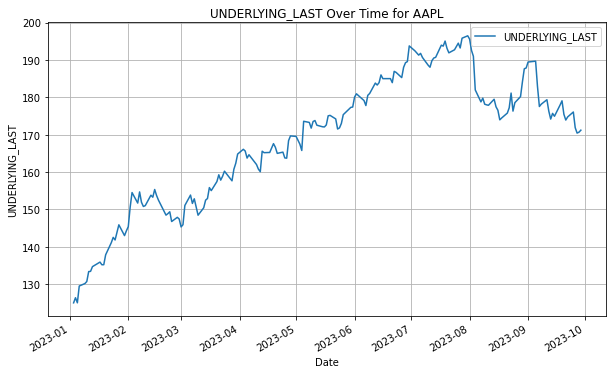

In [116]:
# Plot the UNDERLYING_LAST (last price of the underlying asset) over time using QUOTE_DATE
plt.figure(figsize=(30, 25))
data_AAPL.plot(x='QUOTE_DATE', y='UNDERLYING_LAST', figsize=(10, 6))
plt.title('UNDERLYING_LAST Over Time for AAPL')
plt.xlabel('Date')
plt.ylabel('UNDERLYING_LAST')
plt.grid(True)
plt.show()

<Figure size 2160x1800 with 0 Axes>

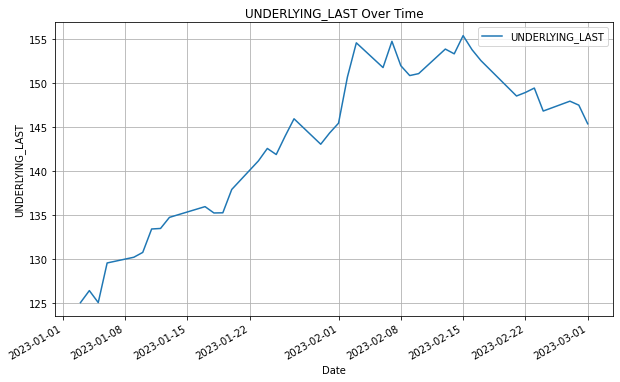

In [83]:
# SHORTER TIME
plt.figure(figsize=(30, 25))
data_AAPL_filtered.plot(x='QUOTE_DATE', y='UNDERLYING_LAST', figsize=(10, 6))
plt.title('UNDERLYING_LAST Over Time')
plt.xlabel('Date')
plt.ylabel('UNDERLYING_LAST')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

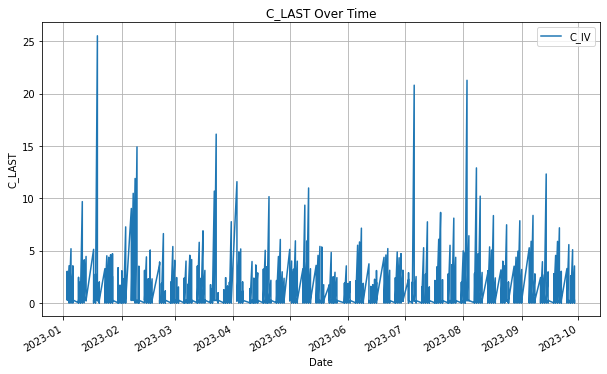

In [84]:
# Plot C_LAST over time
plt.figure(figsize=(10, 6))
data_AAPL.plot(x = 'QUOTE_DATE', y='C_IV', figsize=(10, 6))
plt.title('C_LAST Over Time')
plt.xlabel('Date')
plt.ylabel('C_LAST')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

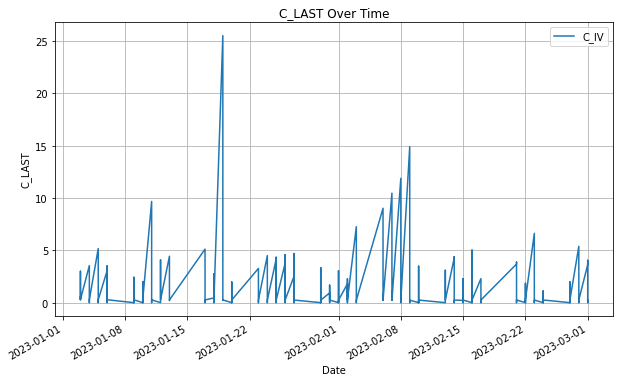

In [85]:
# Plot C_LAST over time SHORTER TIME
plt.figure(figsize=(10, 6))
data_AAPL_filtered.plot(x = 'QUOTE_DATE', y='C_IV', figsize=(10, 6))
plt.title('C_LAST Over Time')
plt.xlabel('Date')
plt.ylabel('C_LAST')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

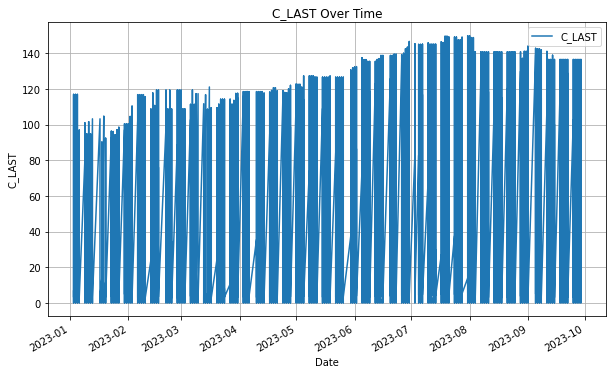

In [86]:
# Plot C_LAST over time
plt.figure(figsize=(10, 6))
data_AAPL.plot(x = 'QUOTE_DATE', y='C_LAST', figsize=(10, 6))
plt.title('C_LAST Over Time')
plt.xlabel('Date')
plt.ylabel('C_LAST')
plt.grid(True)
plt.show()

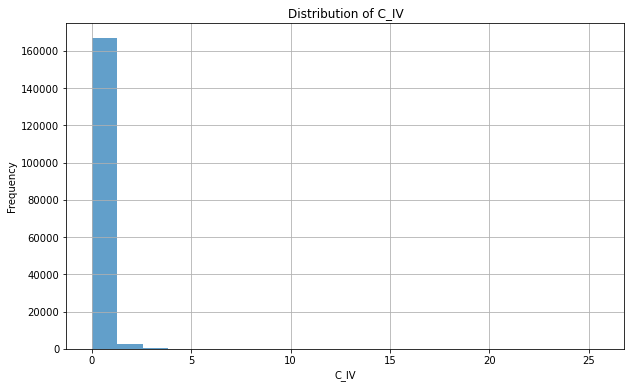

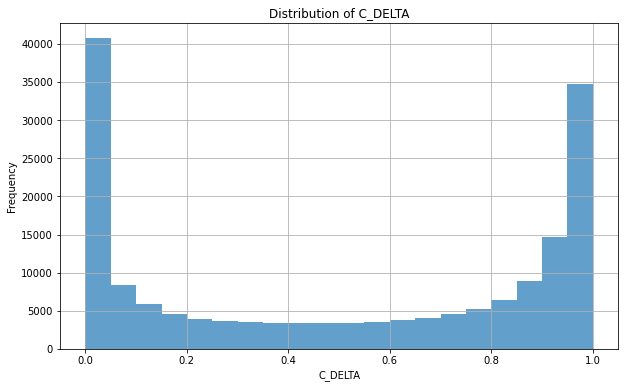

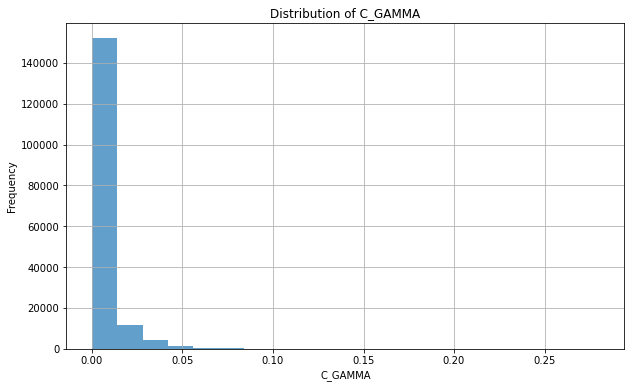

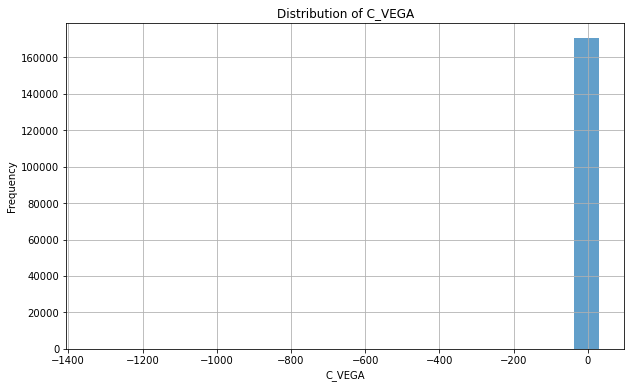

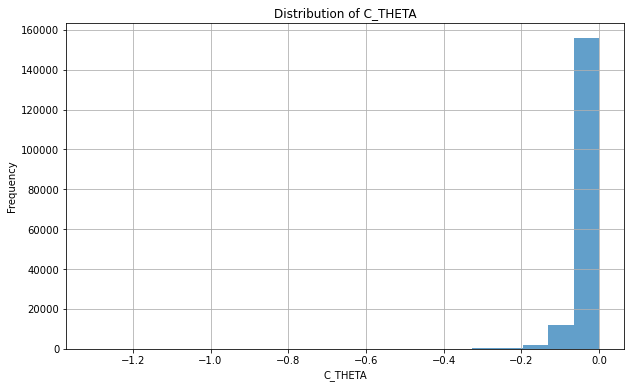

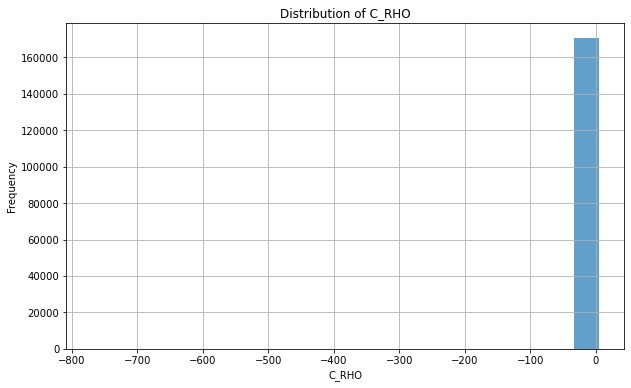

In [88]:
# Histograms for various option metrics
option_metrics = ['C_IV', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO']

for metric in option_metrics:
    plt.figure(figsize=(10, 6))
    plt.hist(data_AAPL[metric], bins=20, alpha=0.7)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


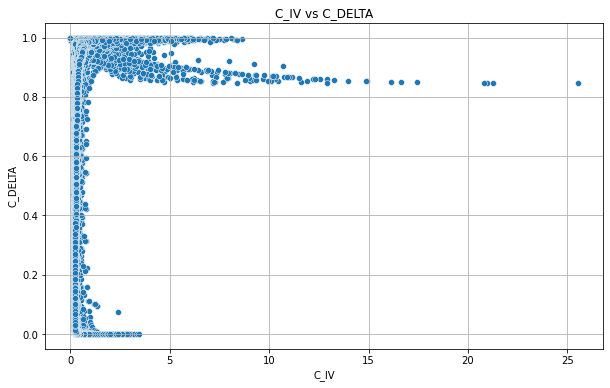

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


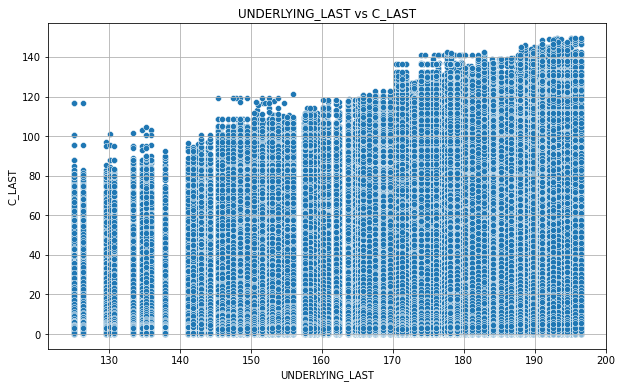

In [89]:
import seaborn as sns

# Scatter plot of C_IV against C_DELTA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='C_IV', y='C_DELTA', data=data_AAPL)
plt.title('C_IV vs C_DELTA')
plt.grid(True)
plt.show()

# Scatter plot of UNDERLYING_LAST vs C_LAST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UNDERLYING_LAST', y='C_LAST', data=data_AAPL)
plt.title('UNDERLYING_LAST vs C_LAST')
plt.grid(True)
plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


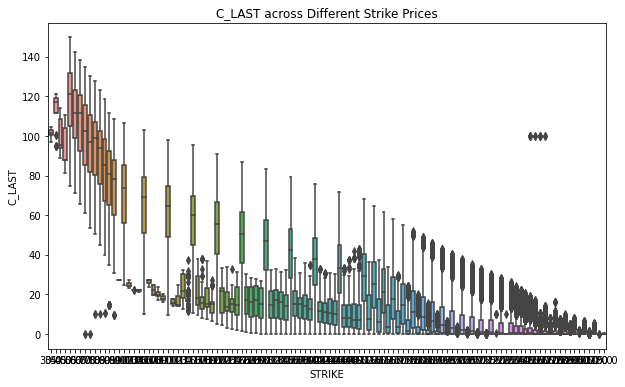

In [90]:
# Box plots for differenttrike prices

plt.figure(figsize=(10, 6))
sns.boxplot(x='STRIKE', y='C_LAST', data=data_AAPL)
plt.title('C_LAST across Different Strike Prices')
plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


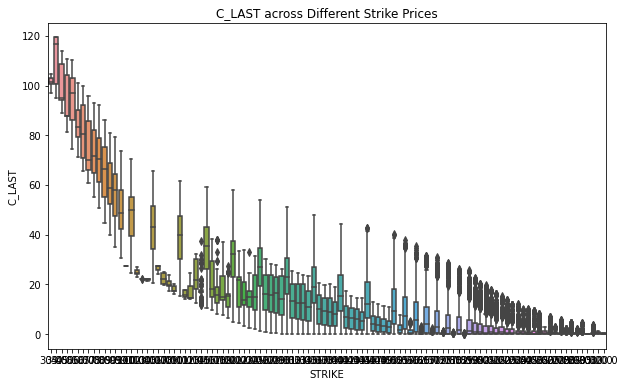

In [91]:
# Box plots for differenttrike prices

plt.figure(figsize=(10, 6))
sns.boxplot(x='STRIKE', y='C_LAST', data=data_AAPL_filtered)
plt.title('C_LAST across Different Strike Prices')
plt.show()

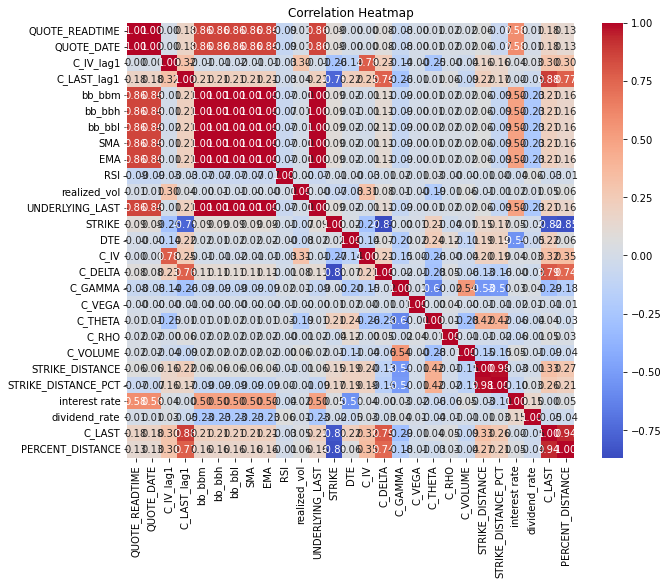

In [92]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_AAPL.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 720x432 with 0 Axes>

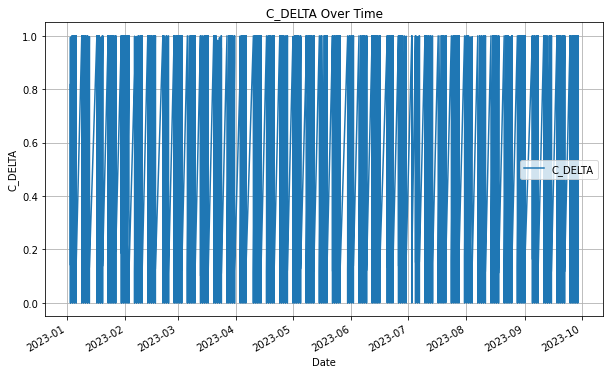

<Figure size 720x432 with 0 Axes>

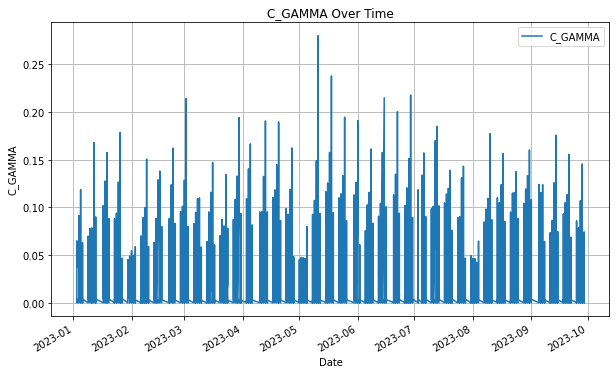

In [93]:
# Greeks over time
plt.figure(figsize=(10, 6))
data_AAPL.plot(x = 'QUOTE_DATE', y = 'C_DELTA', figsize=(10, 6))
plt.title('C_DELTA Over Time')
plt.xlabel('Date')
plt.ylabel('C_DELTA')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
data_AAPL.plot(x = 'QUOTE_DATE', y = 'C_GAMMA', figsize=(10, 6))
plt.title('C_GAMMA Over Time')
plt.xlabel('Date')
plt.ylabel('C_GAMMA')
plt.grid(True)
plt.show()

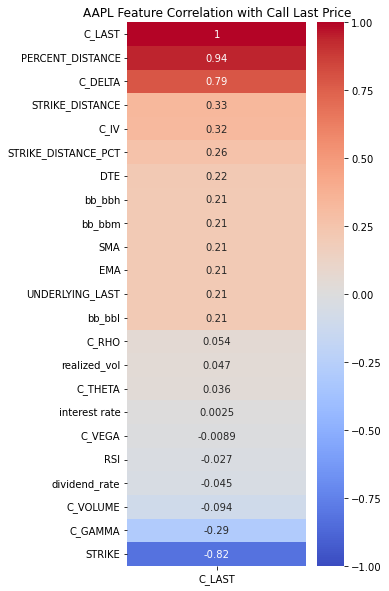

In [101]:
# Calculate the correlation matrix
corr_matrix = data_AAPL[['bb_bbm', 'bb_bbh', 'bb_bbl', 'SMA', 'EMA', 'RSI',
                       'realized_vol', 'UNDERLYING_LAST', 'STRIKE', 'DTE', 'C_IV', 
                       'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 
                       'C_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 
                       'interest rate', 'dividend_rate', 'C_LAST',
                       'PERCENT_DISTANCE']].corr()

# Filter the correlation matrix to only show correlations for 'C_LAST'
c_last_corr = corr_matrix[['C_LAST']].sort_values(by='C_LAST', ascending=False)

# Create the heatmap using Seaborn
plt.figure(figsize=(4, 10))  # Adjust the size appropriately
sns.heatmap(c_last_corr, annot=True, cmap='coolwarm', cbar=True, 
            vmin=-1, vmax=1)  # Set the color bar limits from -1 to 1 for correlation
plt.title('AAPL Feature Correlation with Call Last Price')
plt.show()

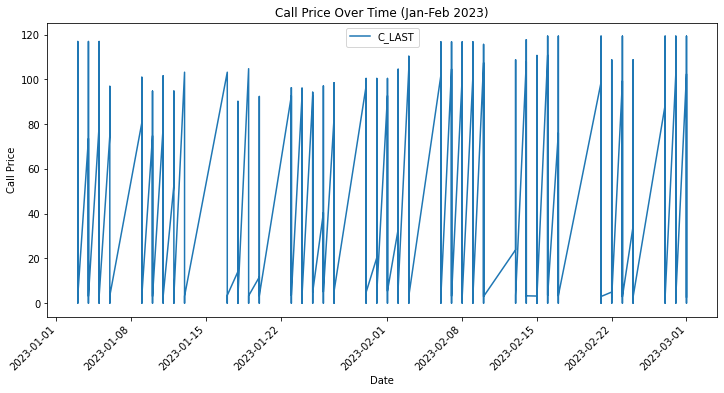

In [96]:
data_AAPL_filtered.plot(x = 'QUOTE_DATE', y = 'C_LAST', figsize=(12, 6))
plt.title('Call Price Over Time (Jan-Feb 2023)')
plt.xlabel('Date')
plt.ylabel('Call Price')
plt.xticks(rotation=45)
plt.show()

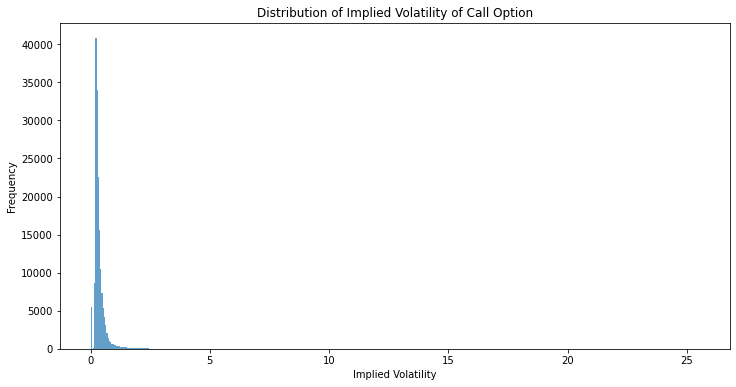

In [98]:
plt.figure(figsize=(12, 6))
plt.hist(data_AAPL['C_IV'], bins=500, alpha=0.7)
plt.title('Distribution of Implied Volatility of Call Option')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()

# NVDIA

In [46]:
data_NVDA['QUOTE_READTIME'] = pd.to_datetime(data_NVDA['QUOTE_READTIME'])
data_NVDA['QUOTE_DATE'] = pd.to_datetime(data_NVDA['QUOTE_DATE'])
data_NVDA = data_NVDA.drop(["QUOTE_UNIXTIME"], axis=1)

<Figure size 720x432 with 0 Axes>

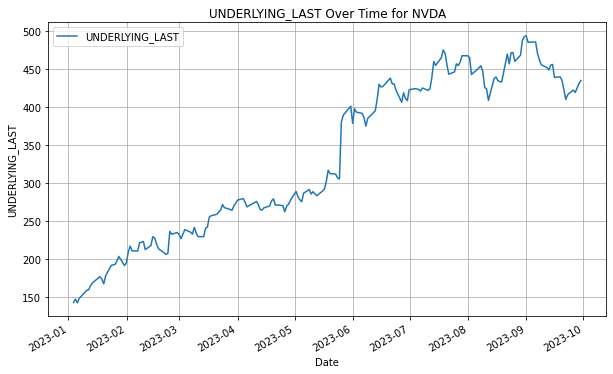

In [47]:
# UNDERLYING_LAST Over Time
plt.figure(figsize=(10, 6))
data_NVDA.plot(x='QUOTE_DATE', y='UNDERLYING_LAST', figsize=(10, 6))
plt.title('UNDERLYING_LAST Over Time for NVDA')
plt.xlabel('Date')
plt.ylabel('UNDERLYING_LAST')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

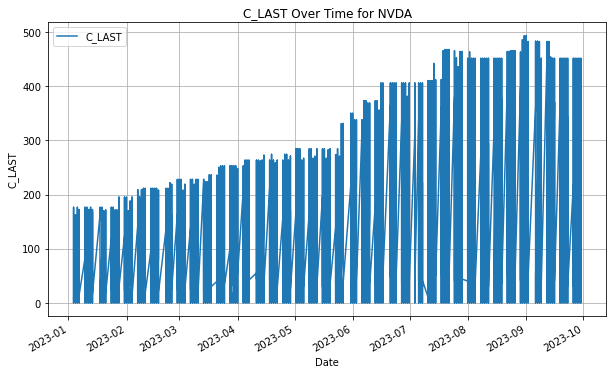

In [48]:
# C_LAST Over Time
plt.figure(figsize=(10, 6))
data_NVDA.plot(x='QUOTE_DATE', y='C_LAST', figsize=(10, 6))
plt.title('C_LAST Over Time for NVDA')
plt.xlabel('Date')
plt.ylabel('C_LAST')
plt.grid(True)
plt.show()

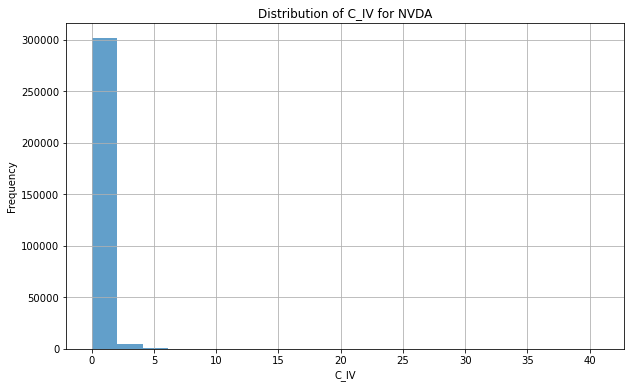

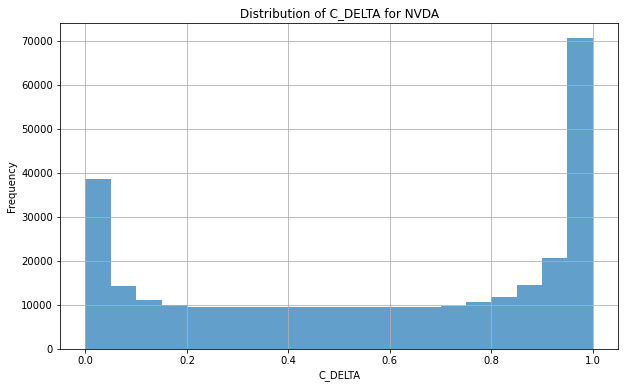

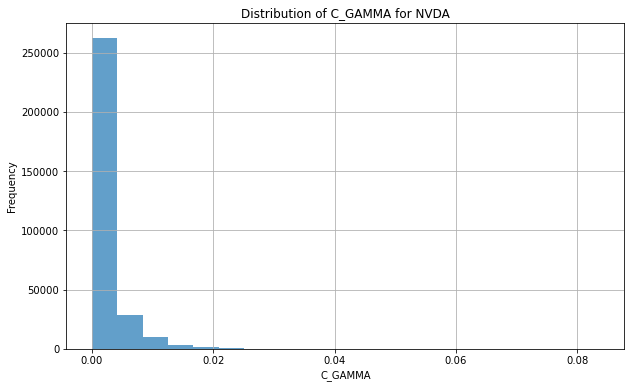

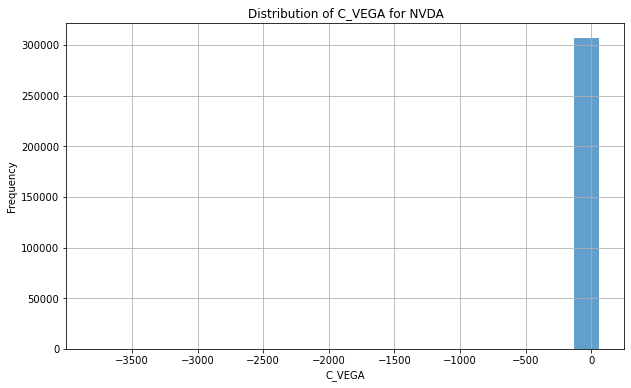

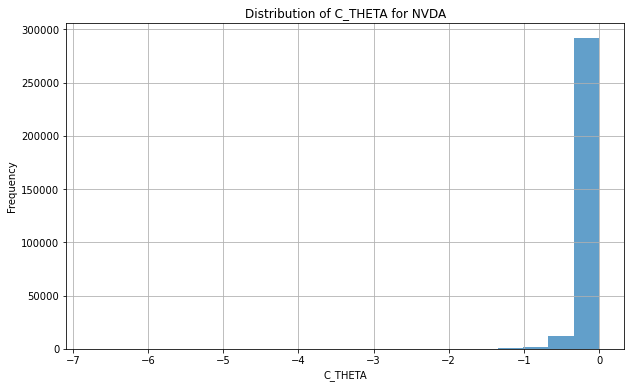

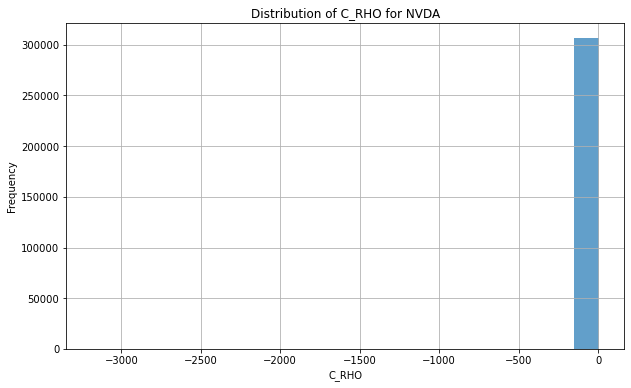

In [49]:
# Histograms for various option metrics
option_metrics = ['C_IV', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO']
for metric in option_metrics:
    plt.figure(figsize=(10, 6))
    plt.hist(data_NVDA[metric], bins=20, alpha=0.7)
    plt.title(f'Distribution of {metric} for NVDA')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


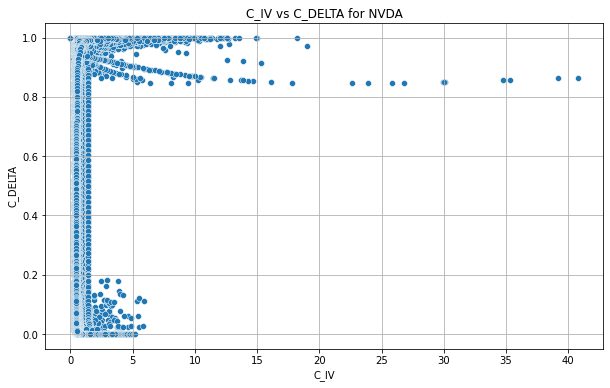

In [50]:
# Scatter plot of C_IV against C_DELTA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='C_IV', y='C_DELTA', data=data_NVDA)
plt.title('C_IV vs C_DELTA for NVDA')
plt.grid(True)
plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


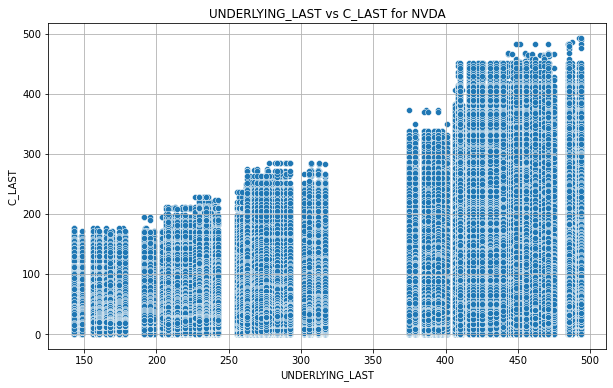

In [51]:
# Scatter plot of UNDERLYING_LAST vs C_LAST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UNDERLYING_LAST', y='C_LAST', data=data_NVDA)
plt.title('UNDERLYING_LAST vs C_LAST for NVDA')
plt.grid(True)
plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


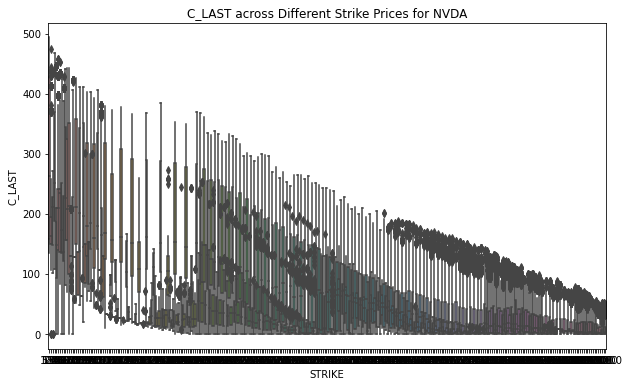

In [52]:
# Box plots for different strike prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='STRIKE', y='C_LAST', data=data_NVDA)
plt.title('C_LAST across Different Strike Prices for NVDA')
plt.show()

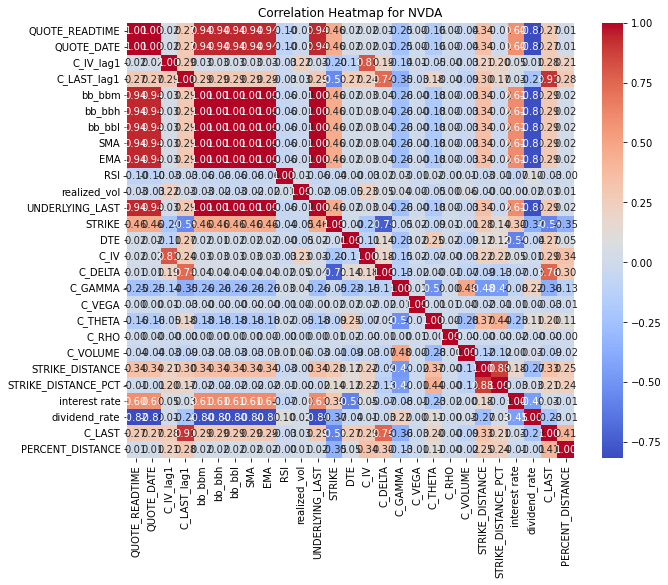

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_NVDA.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for NVDA')
plt.show()

<Figure size 720x432 with 0 Axes>

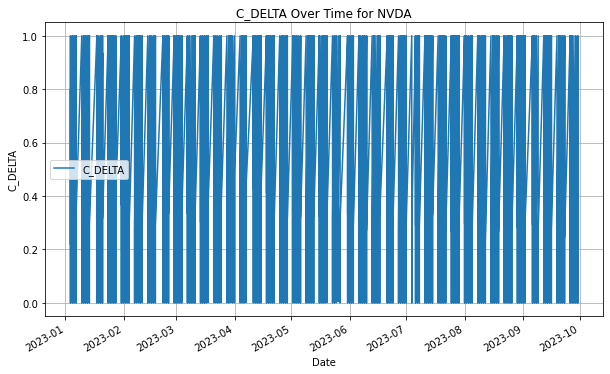

In [38]:
# Greeks over time
plt.figure(figsize=(10, 6))
data_NVDA.plot(x='QUOTE_DATE', y='C_DELTA', figsize=(10, 6))
plt.title('C_DELTA Over Time for NVDA')
plt.xlabel('Date')
plt.ylabel('C_DELTA')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

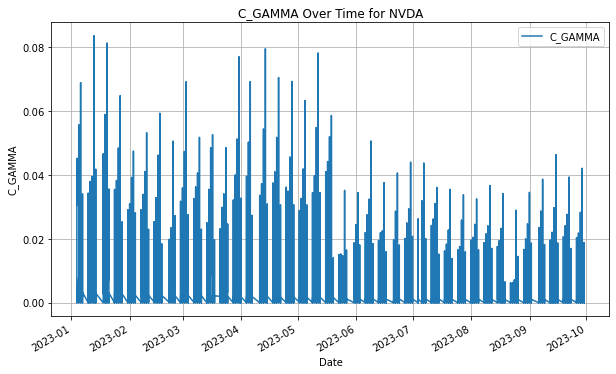

In [39]:
plt.figure(figsize=(10, 6))
data_NVDA.plot(x='QUOTE_DATE', y='C_GAMMA', figsize=(10, 6))
plt.title('C_GAMMA Over Time for NVDA')
plt.xlabel('Date')
plt.ylabel('C_GAMMA')
plt.grid(True)
plt.show()

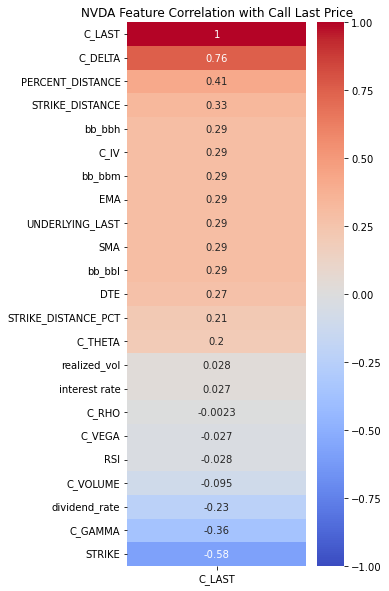

In [100]:
# Calculate the correlation matrix
corr_matrix = data_NVDA[['bb_bbm', 'bb_bbh', 'bb_bbl', 'SMA', 'EMA', 'RSI',
                       'realized_vol', 'UNDERLYING_LAST', 'STRIKE', 'DTE', 'C_IV', 
                       'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 
                       'C_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 
                       'interest rate', 'dividend_rate', 'C_LAST',
                       'PERCENT_DISTANCE']].corr()

# Filter the correlation matrix to only show correlations for 'C_LAST'
c_last_corr = corr_matrix[['C_LAST']].sort_values(by='C_LAST', ascending=False)

# Create the heatmap using Seaborn
plt.figure(figsize=(4, 10))  # Adjust the size appropriately
sns.heatmap(c_last_corr, annot=True, cmap='coolwarm', cbar=True, 
            vmin=-1, vmax=1)  # Set the color bar limits from -1 to 1 for correlation
plt.title('NVDA Feature Correlation with Call Last Price')
plt.show()

# TSLA

In [105]:
data_TSLA['QUOTE_READTIME'] = pd.to_datetime(data_TSLA['QUOTE_READTIME'])
data_TSLA['QUOTE_DATE'] = pd.to_datetime(data_TSLA['QUOTE_DATE'])
data_TSLA = data_TSLA.drop(["QUOTE_UNIXTIME"], axis=1)

<Figure size 720x432 with 0 Axes>

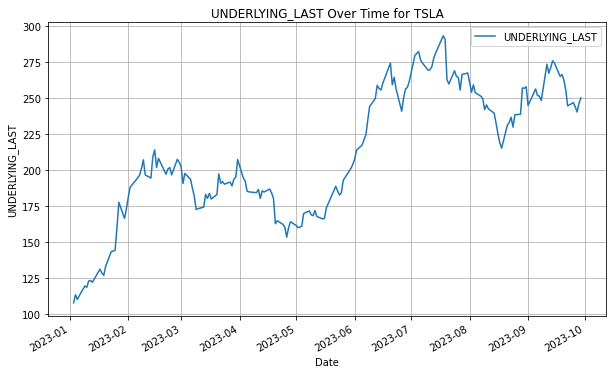

In [106]:

# UNDERLYING_LAST Over Time
plt.figure(figsize=(10, 6))
data_TSLA.plot(x='QUOTE_DATE', y='UNDERLYING_LAST', figsize=(10, 6))
plt.title('UNDERLYING_LAST Over Time for TSLA')
plt.xlabel('Date')
plt.ylabel('UNDERLYING_LAST')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

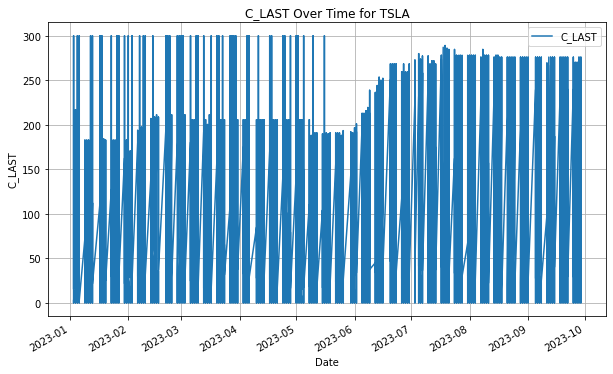

In [107]:
# C_LAST Over Time
plt.figure(figsize=(10, 6))
data_TSLA.plot(x='QUOTE_DATE', y='C_LAST', figsize=(10, 6))
plt.title('C_LAST Over Time for TSLA')
plt.xlabel('Date')
plt.ylabel('C_LAST')
plt.grid(True)
plt.show()

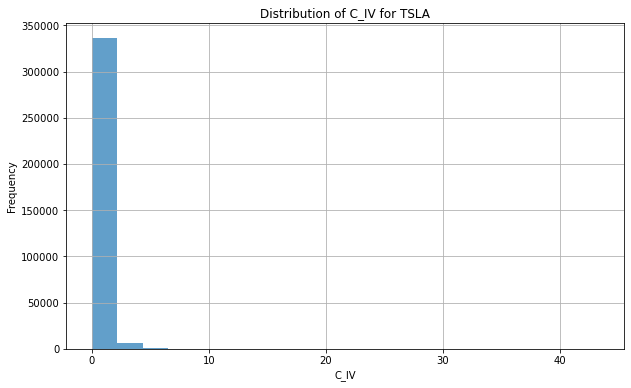

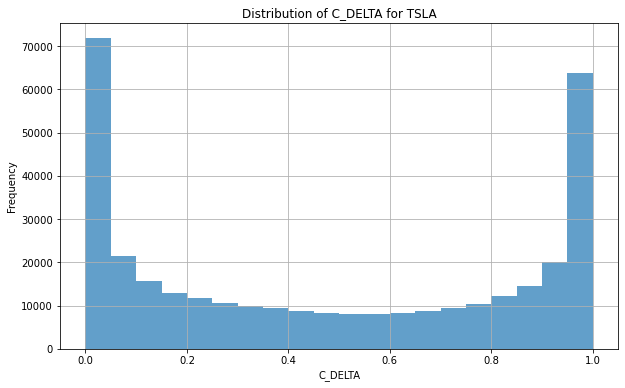

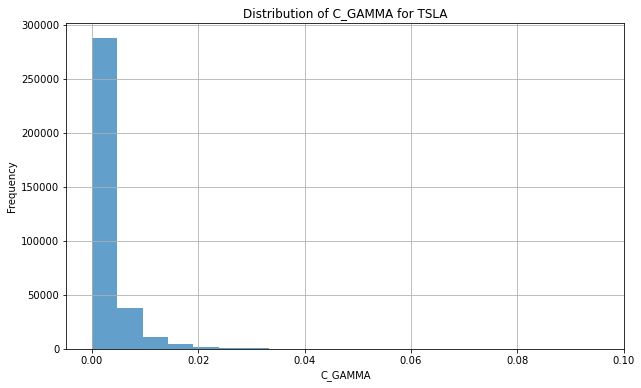

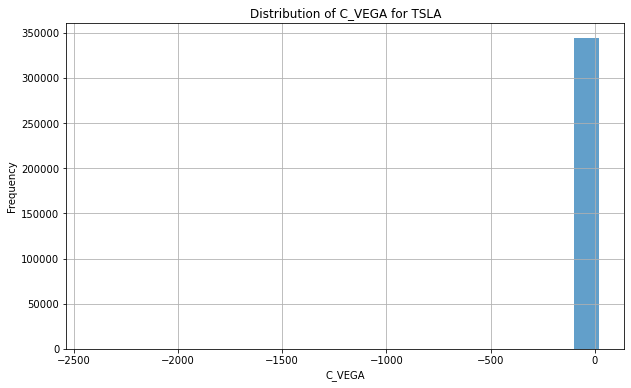

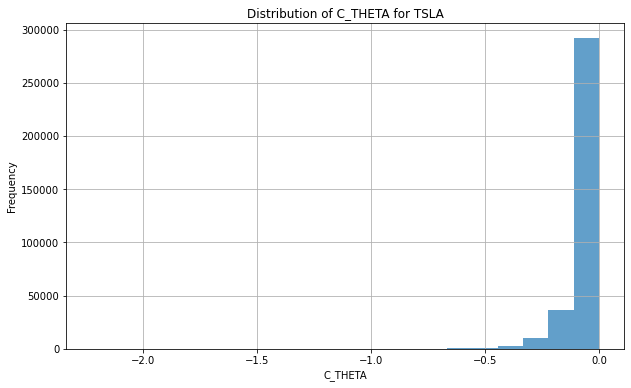

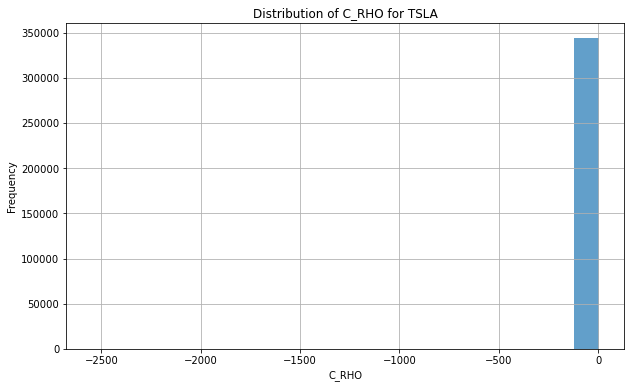

In [108]:
# Histograms for various option metrics
for metric in option_metrics:
    plt.figure(figsize=(10, 6))
    plt.hist(data_TSLA[metric], bins=20, alpha=0.7)
    plt.title(f'Distribution of {metric} for TSLA')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


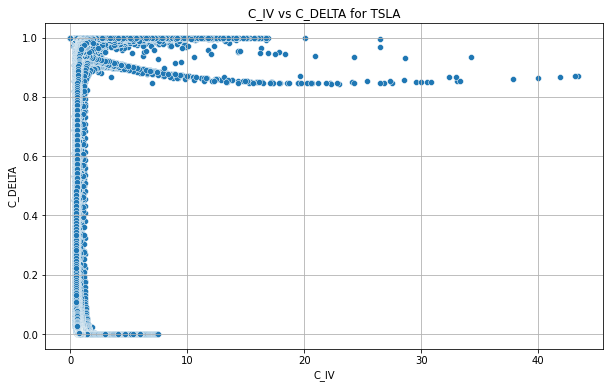

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


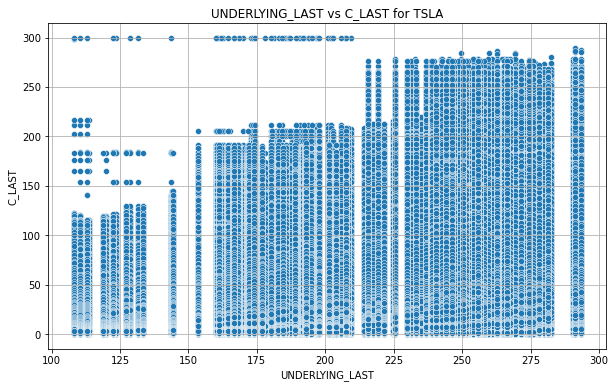

In [109]:
# Scatter plot of C_IV against C_DELTA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='C_IV', y='C_DELTA', data=data_TSLA)
plt.title('C_IV vs C_DELTA for TSLA')
plt.grid(True)
plt.show()

# Scatter plot of UNDERLYING_LAST vs C_LAST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UNDERLYING_LAST', y='C_LAST', data=data_TSLA)
plt.title('UNDERLYING_LAST vs C_LAST for TSLA')
plt.grid(True)
plt.show()

C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anany\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


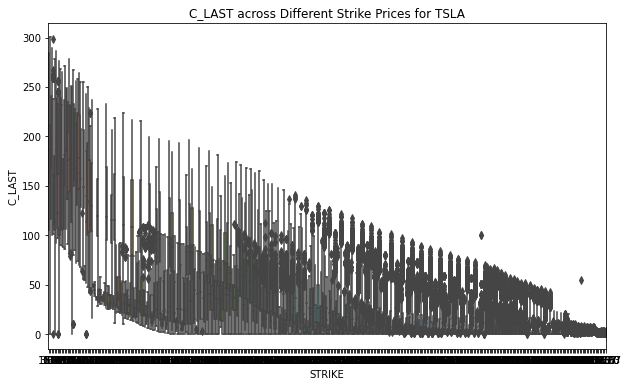

In [110]:
# Box plots for different strike prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='STRIKE', y='C_LAST', data=data_TSLA)
plt.title('C_LAST across Different Strike Prices for TSLA')
plt.show()

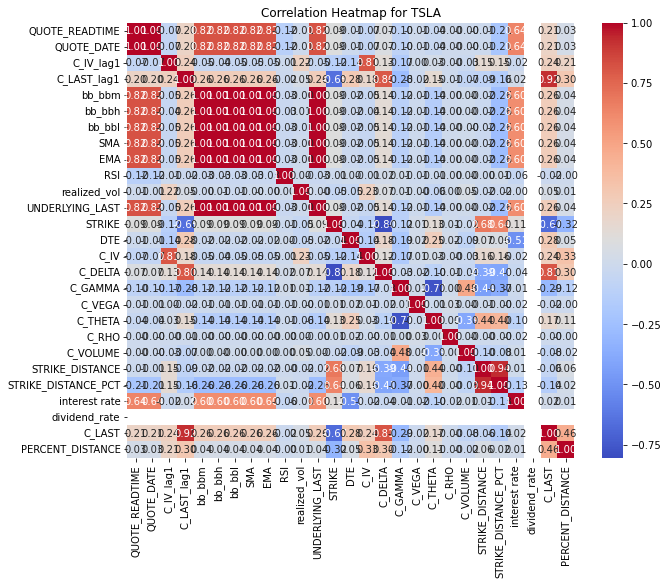

In [111]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_TSLA.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for TSLA')
plt.show()

<Figure size 720x432 with 0 Axes>

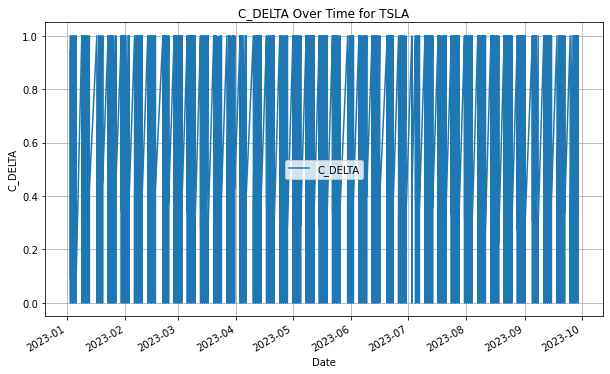

In [112]:
# Greeks over time
plt.figure(figsize=(10, 6))
data_TSLA.plot(x='QUOTE_DATE', y='C_DELTA', figsize=(10, 6))
plt.title('C_DELTA Over Time for TSLA')
plt.xlabel('Date')
plt.ylabel('C_DELTA')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

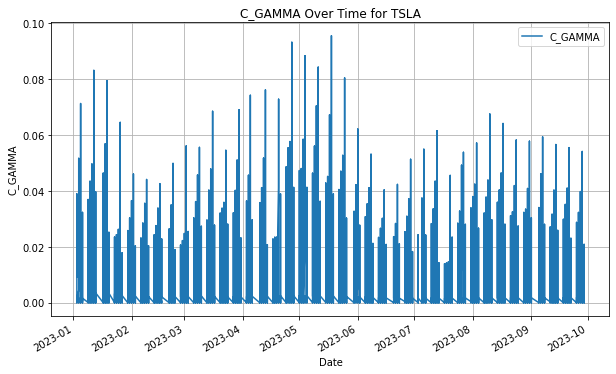

In [113]:
plt.figure(figsize=(10, 6))
data_TSLA.plot(x='QUOTE_DATE', y='C_GAMMA', figsize=(10, 6))
plt.title('C_GAMMA Over Time for TSLA')
plt.xlabel('Date')
plt.ylabel('C_GAMMA')
plt.grid(True)
plt.show()

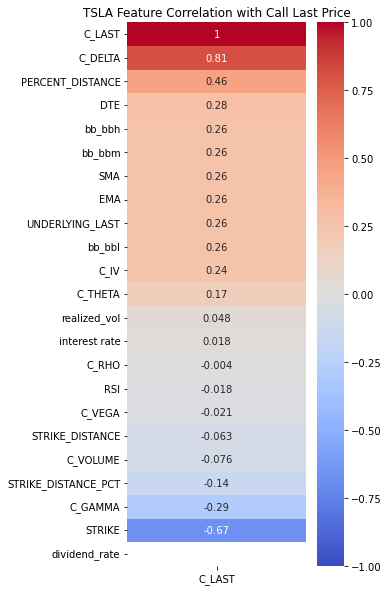

In [117]:
# Calculate the correlation matrix
corr_matrix = data_TSLA[['bb_bbm', 'bb_bbh', 'bb_bbl', 'SMA', 'EMA', 'RSI',
                       'realized_vol', 'UNDERLYING_LAST', 'STRIKE', 'DTE', 'C_IV', 
                       'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 
                       'C_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT', 
                       'interest rate', 'dividend_rate', 'C_LAST',
                       'PERCENT_DISTANCE']].corr()

# Filter the correlation matrix to only show correlations for 'C_LAST'
c_last_corr = corr_matrix[['C_LAST']].sort_values(by='C_LAST', ascending=False)

# Create the heatmap using Seaborn
plt.figure(figsize=(4, 10))  # Adjust the size appropriately
sns.heatmap(c_last_corr, annot=True, cmap='coolwarm', cbar=True, 
            vmin=-1, vmax=1)  # Set the color bar limits from -1 to 1 for correlation
plt.title('TSLA Feature Correlation with Call Last Price')
plt.show()